                        UAS Project Praktikum Pengolahan Citra

         "Membuat Studi Kasus Menggunakan Tahapan Deep Learning 1-8"


Dataset Citra Pribadi : (Judul "Klasifikasi Citra Makanan Telur Dadar dan Telur Balado Menggunakan Model Vision Transformer(ViT)

Anggota Kelompok:
- Muhammad Rizal (G.211.22.0107)

- Muhammad Dedi Setiawan (G.211.22.0086)

- Bernandika Reyhan Groovytala (G.211.22.0109)



**Tahap 1 Import Library**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

**Tahap 2 Akses Data (Mount Drive)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Tahap 3 Data Preparation**

In [ ]:
#Transformasi Data
# Menentukan preprocessing gambar sebelum masuk ke model
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Mengubah ukuran gambar ke 224x224 (standar ViT)
    transforms.ToTensor(),  # Mengubah gambar menjadi tensor
    transforms.Normalize(  # Normalisasi agar distribusi data stabil
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

In [ ]:
#Load Dataset
# Memuat dataset gambar dari folder dengan struktur per kelas
dataset = datasets.ImageFolder(
    root="/content/drive/MyDrive/Project UAS Citra Kelompok/Dataset Pribadi ",
    transform=transform
)

# Mengambil nama kelas dari folder dataset
class_names = dataset.classes
print(class_names)

['Telur Balado', 'Telur Dadar']


In [ ]:
#Split Data (Train & Validation)
# Membagi dataset menjadi data latih (80%) dan data validasi (20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(
    dataset, [train_size, val_size]
)

# Membuat DataLoader untuk training dan validation
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

**Tahap 4 Model Architecture Selection & Model Construction**

In [ ]:
#Load Pre-trained Vision Transformer
# Memuat model Vision Transformer (ViT-B/16) yang sudah di-pretrain
model = models.vit_b_16(pretrained=True)

#Ganti Classification Head Menjadi 2 Karena ada 2 kelas saja
num_features = model.heads.head.in_features
model.heads.head = nn.Linear(num_features, 2)

#Pindahkan Model ke Device
# Menggunakan GPU jika tersedia, jika tidak gunakan CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

**Tahap 5 Training Pipeline Setup**

In [ ]:
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss digunakan untuk klasifikasi
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Optimizer Adam untuk update bobot model

**Tahap 6 Training the Model**

In [ ]:
#Inisialisasi Variabel untuk Logging
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
epochs = 5  # Jumlah epoch pelatihan

for epoch in range(epochs):
    # TRAIN
    model.train()  # Mengaktifkan mode training
    running_loss = 0.0  # Menyimpan total loss
    correct = 0         # Jumlah prediksi benar
    total = 0           # Total data

    for images, labels in train_loader:  # Loop data training
        images, labels = images.to(device), labels.to(device)    # Kirim ke device

        optimizer.zero_grad()  # Reset gradien
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Hitung loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update bobot

        running_loss += loss.item()  # Akumulasi loss

        _, predicted = torch.max(outputs, 1)  # Ambil prediksi kelas
        total += labels.size(0)  # Tambah jumlah data
        correct += (predicted == labels).sum().item()  # Hitung benar

    train_loss = running_loss / len(train_loader)  # Rata-rata loss training
    train_acc = 100 * correct / total  # Akurasi training

    train_losses.append(train_loss)  # Simpan loss training
    train_accuracies.append(train_acc)  # Simpan akurasi training

    #  VALIDATION
    model.eval()  # Mengaktifkan mode evaluasi
    running_loss = 0.0  # Reset loss
    correct = 0         # Reset prediksi benar
    total = 0           # Reet total data

    with torch.no_grad():  # Nonakitfkan gradien
        for images, labels in val_loader:  # Loop data validasi
            images, labels = images.to(device), labels.to(device)  # Kirim ke device

            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Hitung loss

            running_loss += loss.item()  # Akumulasi loss

            _, predicted = torch.max(outputs, 1)  # Ambil prediksi kelas
            total += labels.size(0)  # Tambah jumlah data
            correct += (predicted == labels).sum().item()  # Hitung benar

    val_loss = running_loss / len(val_loader)  # Rata-rata loss validasi
    val_acc = 100 * correct / total  # Akurasi validasi

    val_losses.append(val_loss)  #Simpan loss validasi
    val_accuracies.append(val_acc)  #Simpan akurasi validasi

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")  # Tampilkan hasil epoch

Epoch [1/5] Train Loss: 0.3796 | Train Acc: 86.19% Val Loss: 0.6007 | Val Acc: 45.65%
Epoch [2/5] Train Loss: 0.1541 | Train Acc: 90.61% Val Loss: 0.0209 | Val Acc: 97.83%
Epoch [3/5] Train Loss: 0.0112 | Train Acc: 100.00% Val Loss: 0.0032 | Val Acc: 100.00%
Epoch [4/5] Train Loss: 0.0192 | Train Acc: 99.45% Val Loss: 0.1995 | Val Acc: 93.48%
Epoch [5/5] Train Loss: 0.0157 | Train Acc: 98.90% Val Loss: 0.0795 | Val Acc: 95.65%


**Tahap 7 Prediction**

In [ ]:
from PIL import Image

# Fungsi untuk memprediksi beberapa gambar
def predict_multiple_images(model, image_paths, transform, class_names):
    model.eval() # Mengaktifkan mode evaluasi
    results = [] # Menyimpan hasil prediksi

    with torch.no_grad():  # Menonaktifkan perhitungan gradien
        for path in image_paths: # Loop setiap path gambar
            image = Image.open(path).convert("RGB") # Membuka dan konversi gambar ke RGB
            image_tensor = transform(image).unsqueeze(0).to(device) # Transform dan tambah dimensi batch

            outputs = model(image_tensor) # Forward pass
            probabilities = torch.softmax(outputs, dim=1) # Menghitung probabilitas
            predicted_class = torch.argmax(probabilities, dim=1).item() # Kelas prediksi
            confidence = probabilities[0][predicted_class].item() # Nilai confidence


            results.append((path, class_names[predicted_class], confidence, image))  # Simpan hasil

    return results

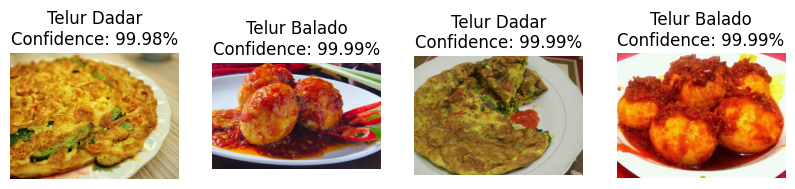

In [ ]:
 # Daftar path gambar uji
 image_paths = [
    "/content/drive/MyDrive/Project UAS Citra Kelompok/Dataset Pribadi /Telur Dadar/Gambar (16).jpg",
    "/content/drive/MyDrive/Project UAS Citra Kelompok/Dataset Pribadi /Telur Balado/Gambar (1).jpg",
    "/content/drive/MyDrive/Project UAS Citra Kelompok/Dataset Pribadi /Telur Dadar/Gambar (52).jpg",
    "/content/drive/MyDrive/Project UAS Citra Kelompok/Dataset Pribadi /Telur Balado/Gambar (10).jpg"
]

# Melakukan prediksi
results = predict_multiple_images(
    model,
    image_paths,
    transform,
    class_names
)

plt.figure(figsize=(10,5))

for i, (path, label, conf, img) in enumerate(results):
    plt.subplot(1, len(results), i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{label}\nConfidence: {conf*100:.2f}%")

plt.show()

**Tahap 8 Evalution**

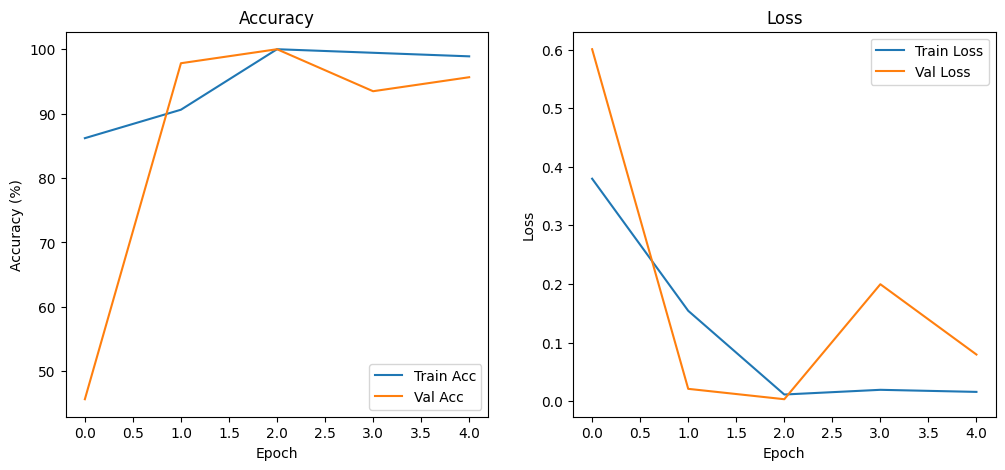

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.eval()
correct = 0
total = 0
val_loss = 0.0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        # Hitung loss validasi
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        # Hitung akurasi
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Rata-rata validation loss
avg_val_loss = val_loss / len(val_loader)

accuracy = 100 * correct / total

print(f"Validation Loss    : {avg_val_loss:.2f}%")
print(f"Validation Accuracy: {accuracy:.2f}%")

Validation Loss    : 0.08%
Validation Accuracy: 95.65%


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

<Figure size 500x500 with 0 Axes>

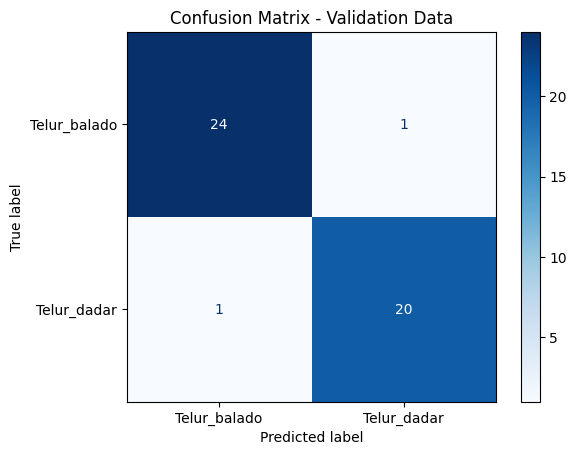

In [ ]:
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names
)

plt.figure(figsize=(5,5))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Validation Data")
plt.show()

In [ ]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

              precision    recall  f1-score   support

Telur_balado       0.96      0.96      0.96        25
 Telur_dadar       0.95      0.95      0.95        21

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46

